In [3]:
import pandas as pd

# 업로드된 파일 로드
file_path = '/Users/sykim/Desktop/과기대/4-1/데이터마이닝/new_2nd_data.xlsx'
data = pd.read_excel(file_path)

# 데이터프레임의 구조를 이해하기 위해 처음 몇 개의 행을 출력
data.head()


,CT_NM,alone_ratio,old_ratio,welfare_ratio,disabled_ratio
0,가락동,0.166186,0.140697,0.029419,0.069014
1,가락본동,0.264853,0.154773,0.059661,0.073950
2,가리봉동,0.388658,0.171422,0.136007,0.110682
3,가산동,0.288088,0.106477,0.095440,0.097566
4,가양동,0.338955,0.183702,0.250216,0.198713


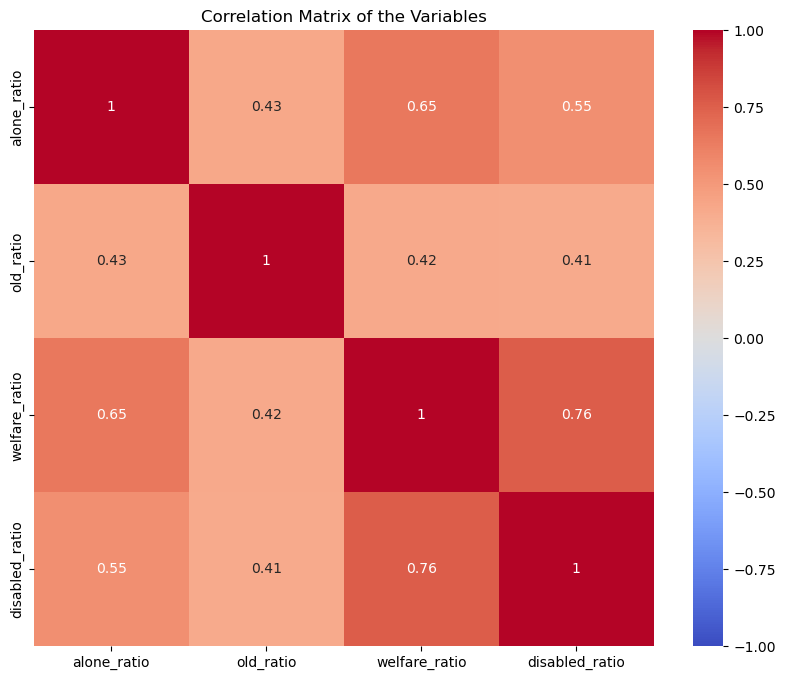

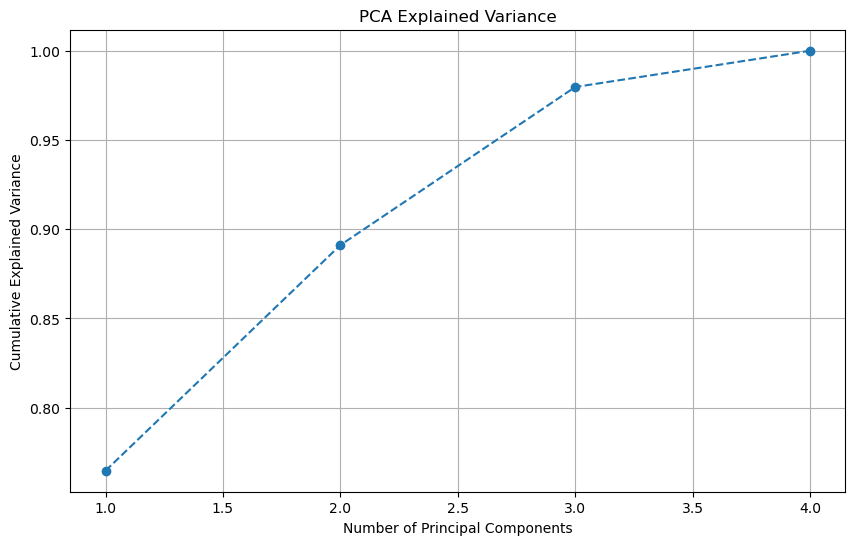

array([0.76468731, 0.89108463, 0.97966753, 1.        ])

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상관 행렬 계산
corr_matrix = data.drop(columns=['CT_NM']).corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of the Variables')
plt.show()

# PCA가 유용한지 확인하기 위해 설명된 분산 계산
from sklearn.decomposition import PCA

# PCA를 위해 'CT_NM' 열 삭제
data_for_pca = data.drop(columns=['CT_NM'])

# PCA fitting
pca = PCA()
pca.fit(data_for_pca)

# 분산
explained_variance = pca.explained_variance_ratio_
explained_variance_cumulative = explained_variance.cumsum()

# 분산 그리기
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance_cumulative, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()

explained_variance_cumulative


C:\Users\sykim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sykim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sykim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sykim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

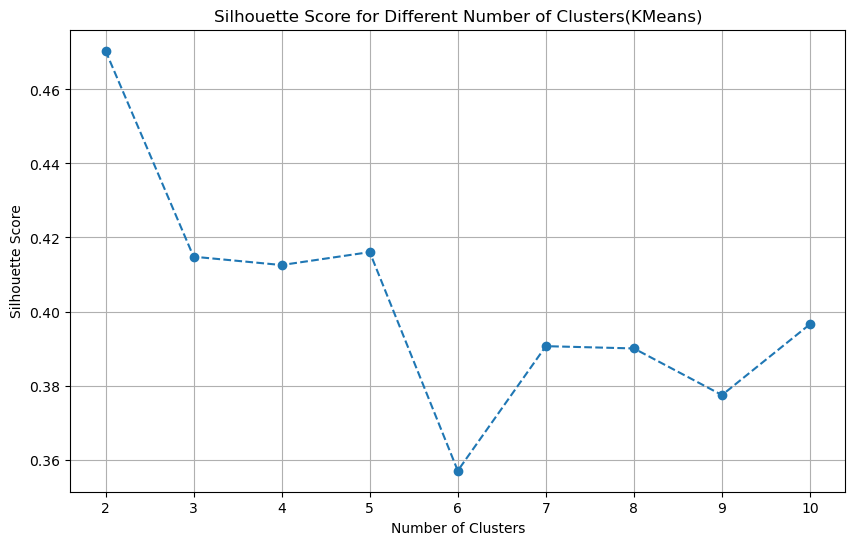

(2, 0.47044469620897966)

In [5]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# PCA를 적용하여 주성분을 2개로 줄이기
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_for_pca)

# 실루엣 점수를 사용하여 최적의 클러스터 수 결정
silhouette_scores = []
range_n_clusters = range(2, 11)  # 2개부터 10개까지의 클러스터 테스트

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_pca)
    silhouette_avg = silhouette_score(data_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 실루엣 점수 그리기
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Number of Clusters(KMeans)')
plt.grid()
plt.show()

# 최적의 클러스터 수 찾기
optimal_n_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
optimal_n_clusters, max(silhouette_scores)


C:\Users\sykim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sykim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sykim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sykim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

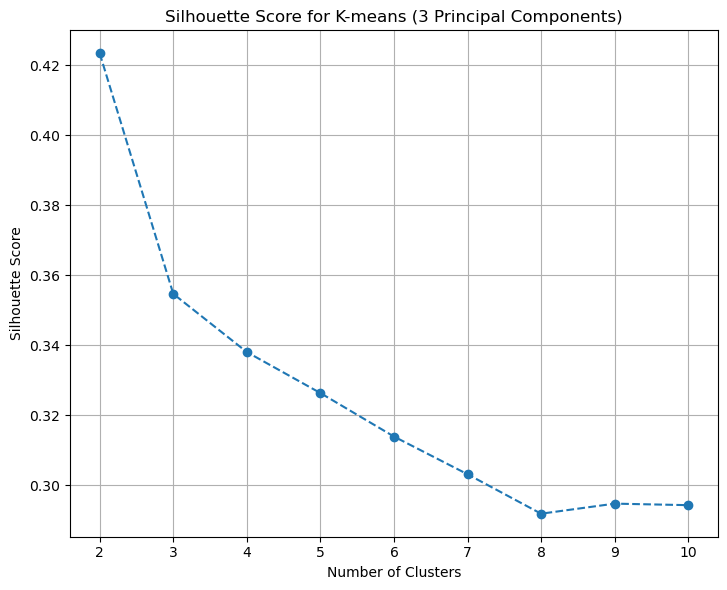

(2, 0.42341667456902726)

In [6]:
# PCA를 적용하여 3개의 주성분으로 차원 축소
pca_3d = PCA(n_components=3)
data_pca_3d = pca_3d.fit_transform(data_for_pca)

# K-meansClustering을 위한 실루엣 점수를 사용하여 최적의 클러스터 개수를 결정
silhouette_scores_kmeans_3d = []

for n_clusters in range_n_clusters:
     # K-means 클러스터링
    kmeans_3d = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels_kmeans_3d = kmeans_3d.fit_predict(data_pca_3d)
    silhouette_avg_kmeans_3d = silhouette_score(data_pca_3d, cluster_labels_kmeans_3d)
    silhouette_scores_kmeans_3d.append(silhouette_avg_kmeans_3d)
    
# K-means clustering을 위한 실루엣 점수를 3개의 주성분으로 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, silhouette_scores_kmeans_3d, marker='o', linestyle='--', label='K-means')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-means (3 Principal Components)')
plt.grid()

plt.tight_layout()
plt.show()

#최적의 클러스터 개수
optimal_n_clusters_kmeans_3d = range_n_clusters[silhouette_scores_kmeans_3d.index(max(silhouette_scores_kmeans_3d))]

optimal_n_clusters_kmeans_3d, max(silhouette_scores_kmeans_3d)


C:\Users\sykim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sykim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sykim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sykim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

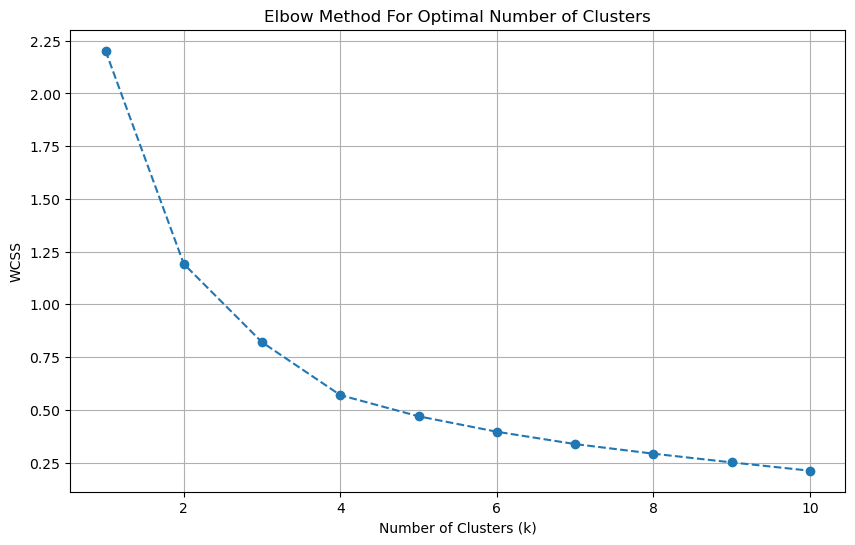

In [10]:
from sklearn.metrics import pairwise_distances_argmin_min

# WCSS (within-cluster sum of squares)를 계산하는 함수
def calculate_wcss(data, max_k):
    wcss = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

# k 값이 1부터 10까지의 WCSS를 계산
max_k = 10
wcss = calculate_wcss(data_pca, max_k)

# Elbow Method 그래프
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.grid()
plt.show()


In [25]:
import pandas as pd
from sklearn.cluster import KMeans
from IPython.display import display

# K-means 클러스터링 적용
kmeans_3_clusters = KMeans(n_clusters=3, random_state=42)
cluster_labels_kmeans_3 = kmeans_3_clusters.fit_predict(data_pca

# 원래 데이터프레임에 클러스터 레이블 추가
data_with_clusters_kmeans_3 = data.copy()
data_with_clusters_kmeans_3['Cluster'] = cluster_labels_kmeans_3

# 전체 데이터프레임 출력
display(data_with_clusters_kmeans_3)



C:\Users\sykim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sykim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CT_NM,alone_ratio,old_ratio,welfare_ratio,disabled_ratio,Cluster
0,가락동,0.166186,0.140697,0.029419,0.069014,1
1,가락본동,0.264853,0.154773,0.059661,0.073950,0
2,가리봉동,0.388658,0.171422,0.136007,0.110682,2
3,가산동,0.288088,0.106477,0.095440,0.097566,0
4,가양동,0.338955,0.183702,0.250216,0.198713,2
...,...,...,...,...,...,...
237,회현동,0.362812,0.253351,0.168556,0.113864,2
238,효창동,0.191260,0.145022,0.034199,0.108037,1
239,후암동,0.293883,0.178920,0.112035,0.109171,0
240,휘경동,0.225776,0.153274,0.056961,0.103819,1


In [26]:
import pandas as pd
from sklearn.cluster import KMeans

# K-means 클러스터링 적용
kmeans_3_clusters = KMeans(n_clusters=3, random_state=42)
cluster_labels_kmeans_3 = kmeans_3_clusters.fit_predict(data_pca)

# 원래 데이터프레임에 클러스터 레이블 추가
data_with_clusters_kmeans_3 = data.copy()
data_with_clusters_kmeans_3['Cluster'] = cluster_labels_kmeans_3

# 엑셀 파일로 저장
output_file = '/Users/sykim/Downloads/data_with_clusters_kmeans_3.xlsx'
data_with_clusters_kmeans_3.to_excel(output_file, index=False)

output_file


C:\Users\sykim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sykim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


'/Users/sykim/Downloads/data_with_clusters_kmeans_3.xlsx'

In [21]:
import pandas as pd
from sklearn.cluster import KMeans

# K-means 클러스터링 적용
kmeans_3_clusters = KMeans(n_clusters=3, random_state=42)
cluster_labels_kmeans_3 = kmeans_3_clusters.fit_predict(data_pca)

# 원래 데이터프레임에 클러스터 레이블 추가
data_with_clusters_kmeans_3 = data.copy()
data_with_clusters_kmeans_3['Cluster'] = cluster_labels_kmeans_3

# 각 클러스터의 각 특성의 평균 계산
cluster_summary = data_with_clusters_kmeans_3.groupby('Cluster').mean()

# 엑셀 파일로 저장
summary_file = '/Users/sykim/Downloads/data_with_clusters_kmeans_3.xlsx'
cluster_summary.to_excel(summary_file)

# 클러스터 요약 출력
cluster_summary



C:\Users\sykim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sykim\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sykim\AppData\Local\Temp\ipykernel_18568\1302783179.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = data_with_clusters_kmeans_3.groupby('Cluster').mean()


,alone_ratio,old_ratio,welfare_ratio,disabled_ratio
Cluster,,,,
0,0.266221,0.173698,0.088672,0.107455
1,0.181998,0.150980,0.045302,0.082480
2,0.404907,0.207230,0.164891,0.132435


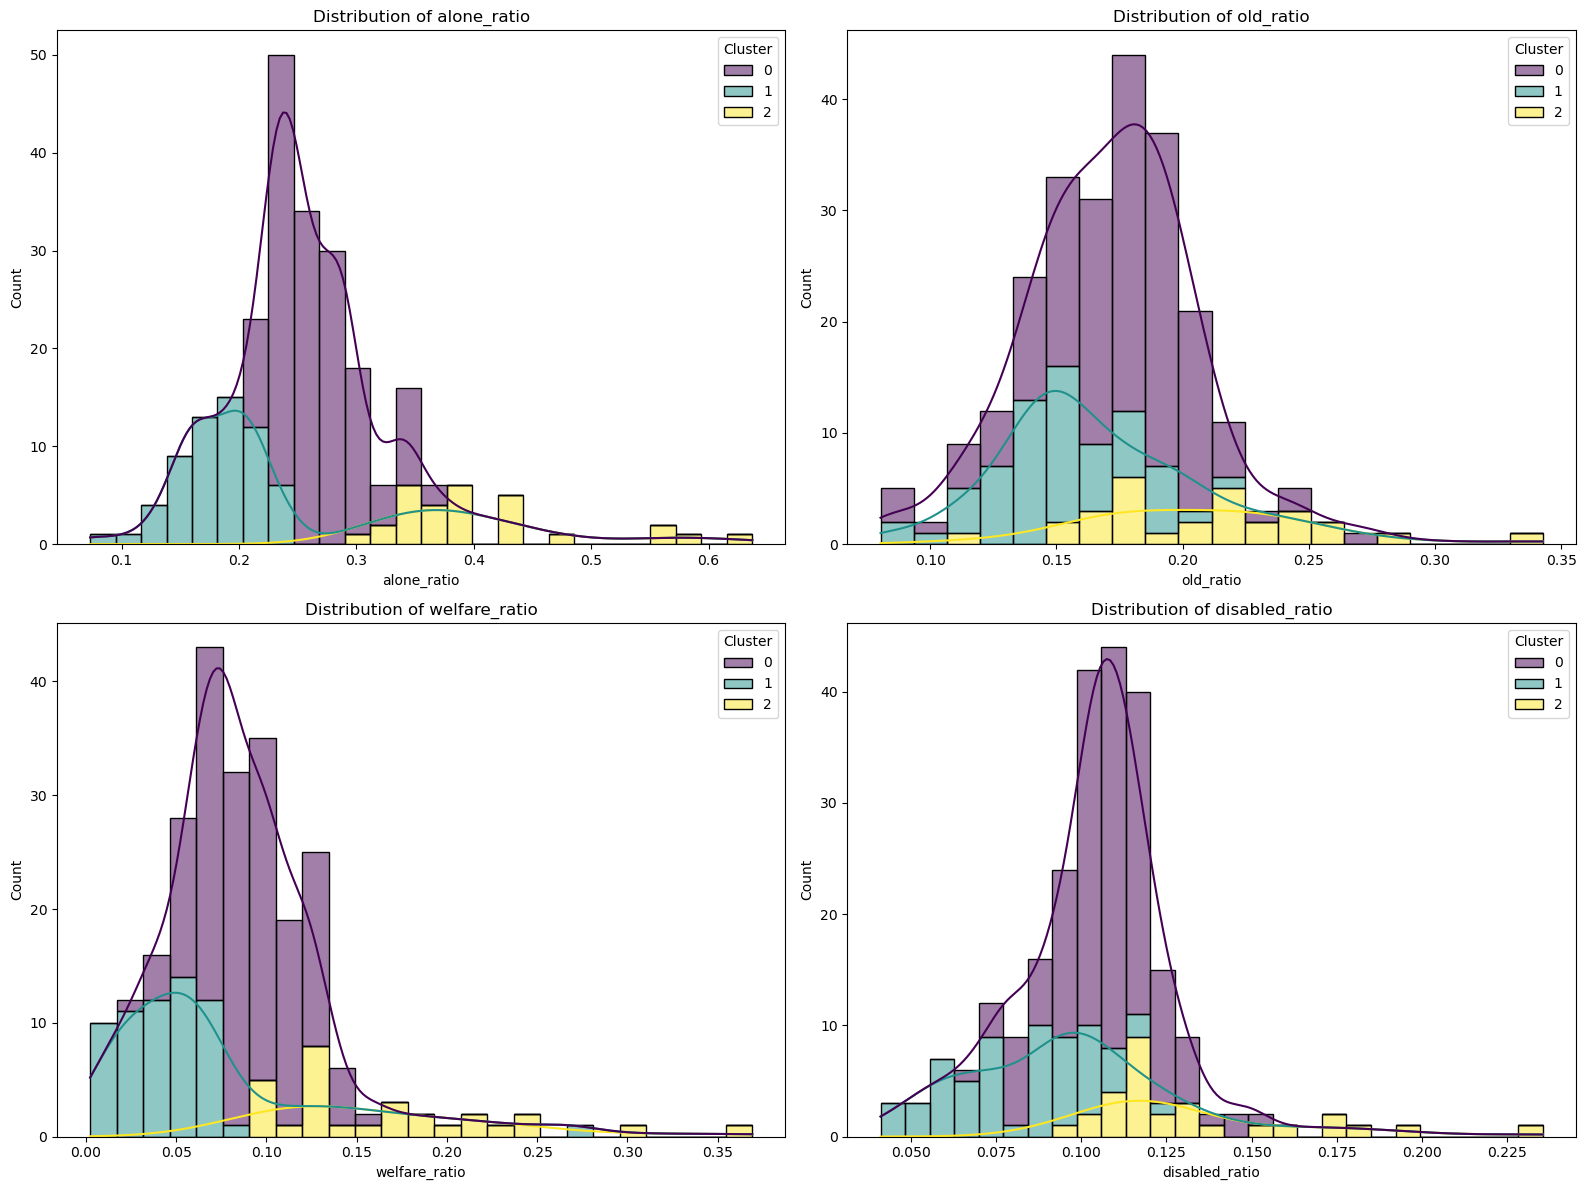

In [23]:
import seaborn as sns

# 각 클러스터별로 그룹화된 각 특징의 히스토그램
features = ['alone_ratio', 'old_ratio', 'welfare_ratio', 'disabled_ratio']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data_with_clusters_kmeans_3, x=feature, hue='Cluster', kde=True, palette='viridis', multiple='stack')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [18]:
from sklearn.cluster import AgglomerativeClustering
from IPython.display import display

# Assuming `data_pca` and `data` are already defined

# 3개의 클러스터로 Agglomerative Clustering을 적용
agg_clustering_3_clusters = AgglomerativeClustering(n_clusters=3)
cluster_labels_agg_3 = agg_clustering_3_clusters.fit_predict(data_pca)

# Add the cluster labels to the original dataframe
data_with_clusters_agg_3 = data.copy()
data_with_clusters_agg_3['Cluster'] = cluster_labels_agg_3

# Display the resulting dataframe
display(data_with_clusters_agg_3)



,CT_NM,alone_ratio,old_ratio,welfare_ratio,disabled_ratio,Cluster
0,가락동,0.166186,0.140697,0.029419,0.069014,0
1,가락본동,0.264853,0.154773,0.059661,0.073950,0
2,가리봉동,0.388658,0.171422,0.136007,0.110682,1
3,가산동,0.288088,0.106477,0.095440,0.097566,0
4,가양동,0.338955,0.183702,0.250216,0.198713,1
...,...,...,...,...,...,...
237,회현동,0.362812,0.253351,0.168556,0.113864,1
238,효창동,0.191260,0.145022,0.034199,0.108037,0
239,후암동,0.293883,0.178920,0.112035,0.109171,1
240,휘경동,0.225776,0.153274,0.056961,0.103819,0


In [19]:
# 엑셀 파일로 저장
output_file = '/Users/sykim/Downloads/data_with_clusters_agg_3.xlsx'
data_with_clusters_agg_3.to_excel(output_file, index=False)

output_file

'/Users/sykim/Downloads/data_with_clusters_agg_3.xlsx'

In [15]:
# 각 클러스터의 각 특성의 평균 계산
cluster_summary = data_with_clusters_agg_3.groupby('Cluster').mean()

# 엑셀 파일로 저장
summary_file = '/Users/sykim/Downloads/data_with_clusters_agg_3.xlsx'
cluster_summary.to_excel(summary_file)

# 클러스터 요약 출력
cluster_summary

C:\Users\sykim\AppData\Local\Temp\ipykernel_25232\228455719.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = data_with_clusters_agg_3.groupby('Cluster').mean()


,alone_ratio,old_ratio,welfare_ratio,disabled_ratio
Cluster,,,,
0,0.226827,0.162430,0.068191,0.097137
1,0.327230,0.190445,0.122122,0.118280
2,0.542045,0.244515,0.237474,0.151072
